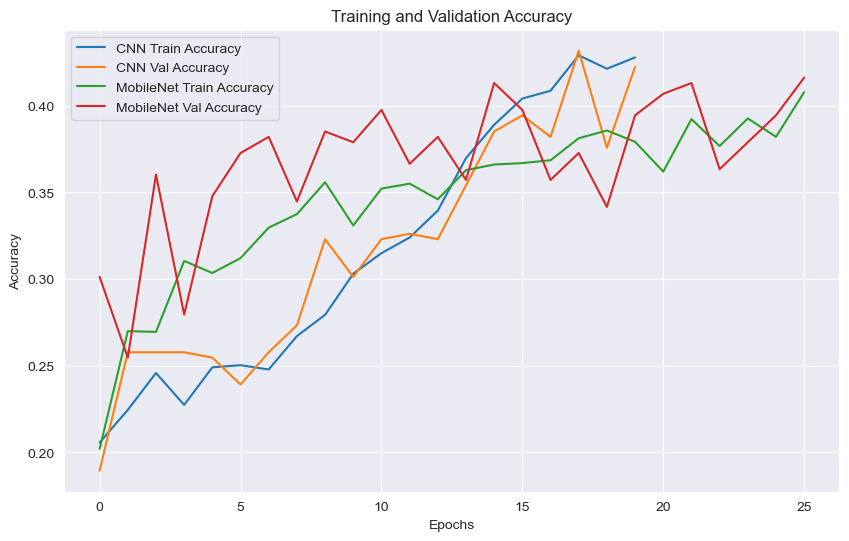

Test Accuracy (CNN): 46.50%
Test Accuracy (MobileNet): 42.68%
Test Accuracy (Fine-tuned): 47.97%


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Load the results from the .npz files
cnn_results = np.load('emotions_CNN.npz', allow_pickle=True)
mobilenet_results = np.load('emotions_mobilenet.npz', allow_pickle=True)
fine_tune_results = np.load('fine_tune_results.npz', allow_pickle=True)


# Access data from the files
cnn_history = cnn_results['history'].item()  # Convert back to dictionary
mobilenet_history = mobilenet_results['history_initial'].item()
fine_tune_history = fine_tune_results['history'].item()

cnn_test_acc = cnn_results['test_acc']
mobilenet_test_acc = mobilenet_results['test_acc']
fine_tune_test_acc = fine_tune_results['test_acc']

# Visualize training and validation accuracy
def plot_training_history(histories, title="Training History"):
    plt.figure(figsize=(10, 6))
    for name, history in histories.items():
        plt.plot(history['accuracy'], label=f'{name} Train Accuracy')
        plt.plot(history['val_accuracy'], label=f'{name} Val Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot the training histories
plot_training_history({
    "CNN": cnn_history,
    "MobileNet": mobilenet_history,
}, title="Training and Validation Accuracy")

# Print test accuracies
print(f"Test Accuracy (CNN): {cnn_test_acc:.2%}")
print(f"Test Accuracy (MobileNet): {mobilenet_test_acc:.2%}")
print(f"Test Accuracy (Fine-tuned): {fine_tune_test_acc:.2%}")

Class      CNN Precision   CNN Recall      CNN F1 Score    MobileNet Precision  MobileNet Recall     MobileNet F1 Score  
----------------------------------------------------------------------------------------------------
Angry      0.19            0.11            0.14            0.24                 0.14                 0.18                
Disgust    0.00            0.00            0.00            0.10                 0.20                 0.13                
Fear       0.16            0.07            0.10            0.33                 0.14                 0.20                
Happy      0.62            0.71            0.66            0.53                 0.69                 0.60                
Sad        0.42            0.33            0.37            0.52                 0.30                 0.38                
Surprise   0.62            0.59            0.61            0.43                 0.65                 0.52                
Neutral    0.40            0.69            0.

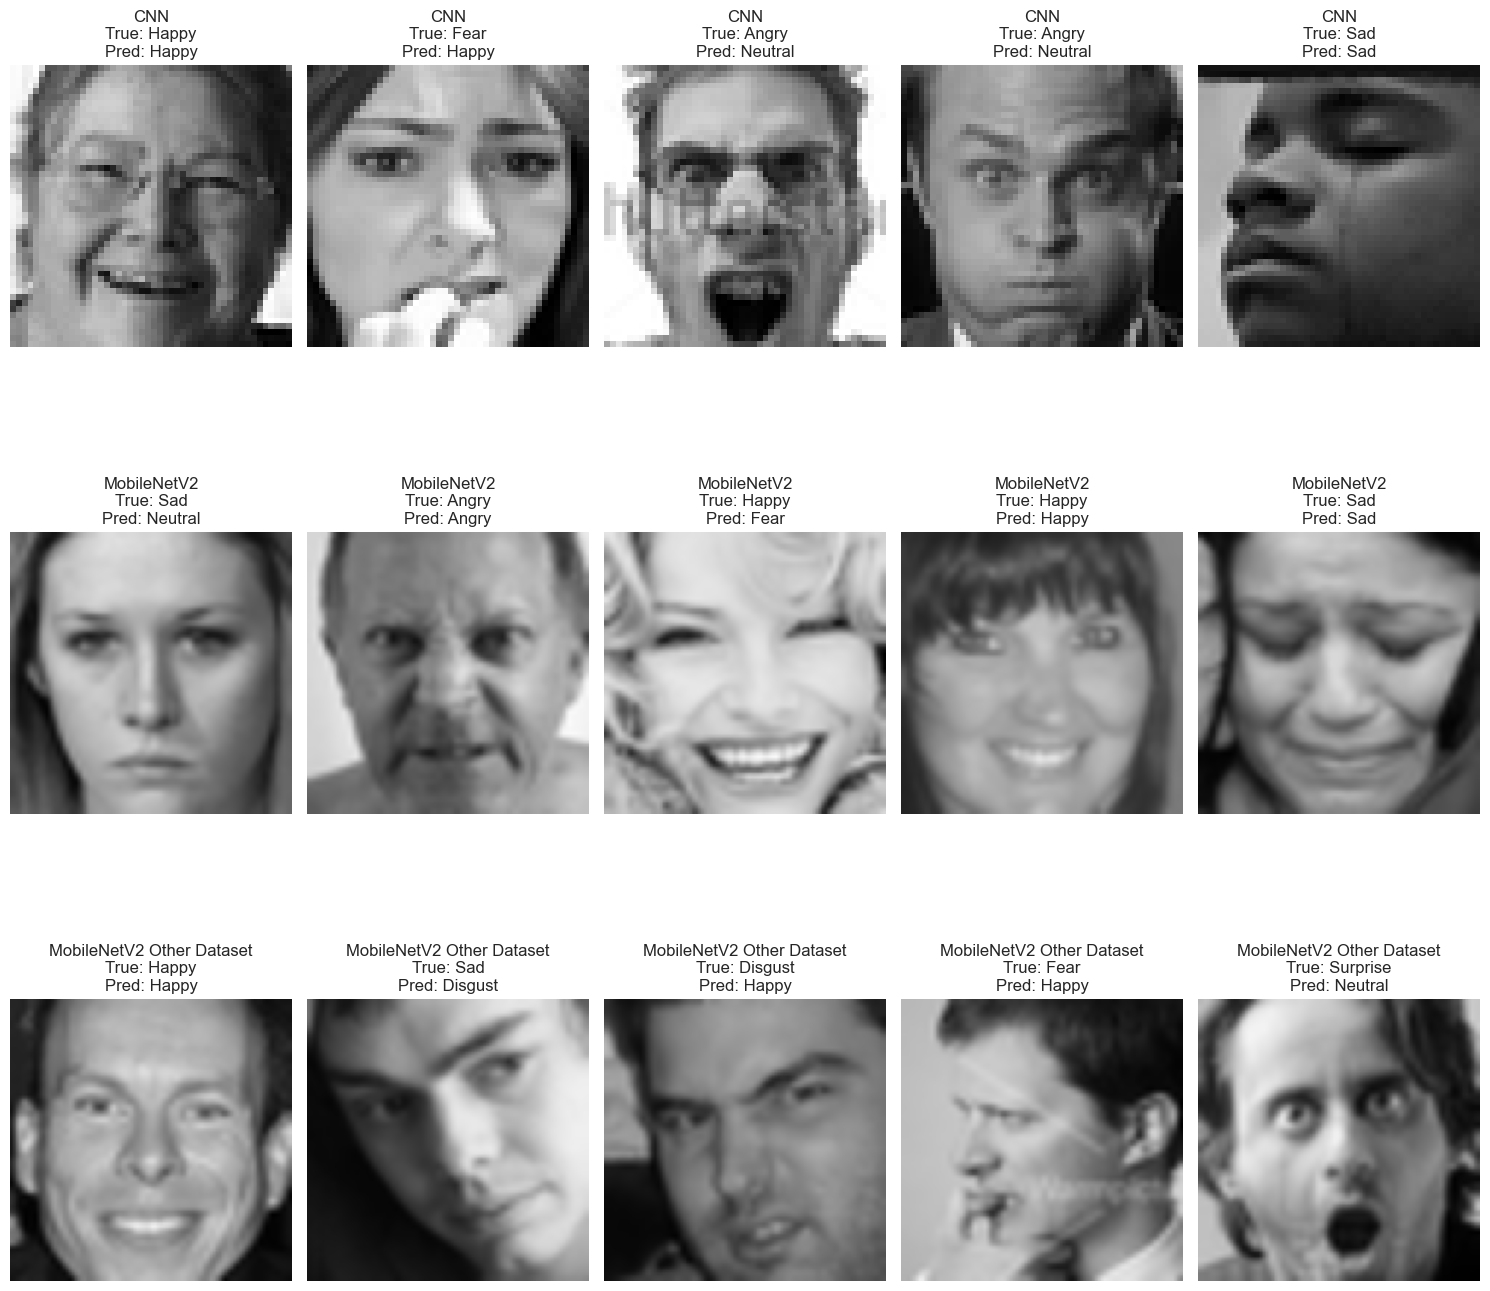

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Load class F1 scores from the JSON file
f1_scores_file = "class_f1_scores.json"
with open(f1_scores_file, "r") as file:
    class_f1_scores = json.load(file)

f1_scores_file2 = "class_f1_scores2.json"
with open(f1_scores_file2, "r") as file:
    class_f1_scores2 = json.load(file)

# Print header
print(f"{'Class':<10} {'CNN Precision':<15} {'CNN Recall':<15} {'CNN F1 Score':<15} {'MobileNet Precision':<20} {'MobileNet Recall':<20} {'MobileNet F1 Score':<20}")
print("-" * 100)

# Print scores side by side
for class_name in class_f1_scores.keys():
    cnn_scores = class_f1_scores[class_name]
    mobilenet_scores = class_f1_scores2[class_name]
    print(f"{class_name:<10} {cnn_scores['precision']:<15.2f} {cnn_scores['recall']:<15.2f} {cnn_scores['f1_score']:<15.2f} {mobilenet_scores['precision']:<20.2f} {mobilenet_scores['recall']:<20.2f} {mobilenet_scores['f1_score']:<20.2f}")

# Load CNN results
cnn_data = np.load("test_results.npz", allow_pickle=True)
cnn_x_test = cnn_data["x_test"]
cnn_y_test = cnn_data["y_test"]
cnn_y_pred_labels = cnn_data["y_pred_labels"]
cnn_class_names = cnn_data["class_names"].tolist()

# Load MobileNetV2 results
mobilenet_data = np.load("test_results2.npz", allow_pickle=True)
mobilenet_x_test = mobilenet_data["x_test"]
mobilenet_y_test = mobilenet_data["y_test"]
mobilenet_y_pred_labels = mobilenet_data["y_pred_labels"]
mobilenet_class_names = mobilenet_data["class_names"].tolist()

mobilenet_data2 = np.load("test_results3.npz", allow_pickle=True)
mobilenet_x_test2 = mobilenet_data2["x_test"]
mobilenet_y_test2 = mobilenet_data2["y_test"]
mobilenet_y_pred_labels2 = mobilenet_data2["y_pred_labels"]
mobilenet_class_names2 = mobilenet_data2["class_names"].tolist()

# Visualize predictions side by side for CNN, MobileNetV2, and MobileNetV2 fine-tuned
def visualize_comparison_all(start=0, num_images=5):
    plt.figure(figsize=(15, 15))

    for i in range(num_images):
        # CNN predictions
        plt.subplot(3, num_images, i + 1)
        img = cnn_x_test[start + i]
        img = np.clip(img, 0.0, 1.0)
        plt.imshow(img)
        plt.axis('off')
        true_label = cnn_class_names[cnn_y_test[start + i]]
        pred_label = cnn_class_names[cnn_y_pred_labels[start + i]]
        plt.title(f"CNN\nTrue: {true_label}\nPred: {pred_label}")

        # MobileNetV2 predictions
        plt.subplot(3, num_images, num_images + i + 1)
        img = mobilenet_x_test[start + i]
        img = np.clip(img, 0.0, 1.0)
        plt.imshow(img)
        plt.axis('off')
        true_label = mobilenet_class_names[mobilenet_y_test[start + i]]
        pred_label = mobilenet_class_names[mobilenet_y_pred_labels[start + i]]
        plt.title(f"MobileNetV2\nTrue: {true_label}\nPred: {pred_label}")

        # MobileNetV2 fine-tuned predictions
        plt.subplot(3, num_images, 2 * num_images + i + 1)
        img = mobilenet_x_test2[start + i]
        img = np.clip(img, 0.0, 1.0)
        plt.imshow(img)
        plt.axis('off')
        true_label = mobilenet_class_names2[mobilenet_y_test2[start + i]]
        pred_label = mobilenet_class_names2[mobilenet_y_pred_labels2[start + i]]
        plt.title(f"MobileNetV2 Other Dataset\nTrue: {true_label}\nPred: {pred_label}")

    plt.tight_layout()
    plt.show()

# Visualize first 5 images
visualize_comparison_all(start=0, num_images=5)

In [26]:
# Function to calculate class-wise accuracies
def calculate_class_accuracies(file_path):
    data = np.load(file_path, allow_pickle=True)
    y_test = data["y_test"]
    y_pred_labels = data["y_pred_labels"]
    class_names = data["class_names"].tolist()

    class_accuracies = {}
    for i, class_name in enumerate(class_names):
        true_class_indices = (y_test == i)
        correct_predictions = (y_pred_labels[true_class_indices] == i).sum()
        total_samples = true_class_indices.sum()
        class_accuracies[class_name] = correct_predictions / total_samples
    return class_accuracies

# Load and calculate accuracies for all results
results_files = ["test_results.npz", "test_results2.npz", "test_results3.npz"]
all_accuracies = [calculate_class_accuracies(file) for file in results_files]

# Display class-wise accuracies side by side
print(f"{'Class':<15} {'CNN':<15} {'MobileNet':<15} {'MobileNet Other Dataset':<15}")
print("-" * 60)
for class_name in all_accuracies[0].keys():
    acc1 = all_accuracies[0][class_name]
    acc2 = all_accuracies[1][class_name]
    acc3 = all_accuracies[2][class_name]
    print(f"{class_name:<15} {acc1:<15.2%} {acc2:<15.2%} {acc3:<15.2%}")

Class           CNN             MobileNet       MobileNet Other Dataset
------------------------------------------------------------
Angry           11.43%          14.29%          14.29%         
Disgust         0.00%           20.00%          20.00%         
Fear            7.14%           14.29%          9.52%          
Happy           71.08%          68.67%          74.70%         
Sad             33.33%          29.63%          20.37%         
Surprise        58.82%          64.71%          2.94%          
Neutral         68.85%          44.26%          6.56%          
